## Load dataset

In [82]:
import pandas as pd

bank_df = pd.read_csv('bank.csv')

bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## EDA

In [83]:
# check for duplicates 
bank_df.duplicated().sum()

0

In [84]:
# check for missing values and dtypes
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [85]:
# check for negative balances
bank_df.query('balance < 0')['balance'].value_counts()

# create categorical column negative_balance
bank_df['negative_balance'] = (bank_df['balance'] < 0).astype("int").astype("object")
bank_df.negative_balance.value_counts()

negative_balance
0    10474
1      688
Name: count, dtype: int64

In [86]:
# count bank products for each client
products = ['housing', 'loan','deposit']

bank_df['products_count'] = bank_df[products].apply(lambda row: sum(row == 'yes'), axis=1)
bank_df.products_count.value_counts()

products_count
1    6317
2    2459
0    2121
3     265
Name: count, dtype: int64

In [87]:
# create new categorical feature age_group out of age 
def categorize_age(age):
    if age < 30:
        return "young"
    elif age < 60:
        return "middle-aged"
    else:
        return "senior"
    
bank_df['age_group'] = bank_df['age'].apply(categorize_age)
bank_df.age_group.value_counts()

age_group
middle-aged    8831
young          1551
senior          780
Name: count, dtype: int64

In [88]:
# create new categorical feature season out of month
def categorize_season(month):
    if month in ['mar', 'apr', 'may']:
        return 'Spring'
    elif month in ['jun', 'jul', 'aug']:
        return 'Summer'
    elif month in ['sep', 'oct', 'nov']:
        return 'Fall'
    else:
        return 'Winter'

bank_df['season'] = bank_df['month'].apply(categorize_season)
bank_df.season.value_counts()

season
Summer    4255
Spring    4023
Fall      1654
Winter    1230
Name: count, dtype: int64

In [89]:
# create new categorical feature previously_contacted out of pdays
bank_df['previously_contacted'] = (bank_df['pdays'] != -1).astype(int).astype("object")
bank_df.previously_contacted.value_counts()

previously_contacted
0    8324
1    2838
Name: count, dtype: int64

In [90]:
# create categorical column for balance_category
bins =  [-float('inf'), 0, bank_df['balance'].quantile(0.25), bank_df['balance'].quantile(0.75), float('inf')]

labels = ['Negative', 'Low', 'Medium', 'High']

bank_df['balance_category'] = pd.cut(bank_df['balance'], bins=bins, labels=labels)
bank_df.balance_category.value_counts()

balance_category
Medium      5580
High        2790
Negative    1462
Low         1330
Name: count, dtype: int64

## Created new features:
- products_count 
    - Counted all banking products
- negative_balance
    - shows if balance is netagive
- age_group season
    - splits age column into custom age groups
- previously_contacted
    - shows if clients was previously contacted
- balance_category
     - splits balance column into custom categories


In [91]:
#  create numeric and categorical lits with columns names
numeric_columns = bank_df.select_dtypes(include=['int']).columns.tolist()
categorical_columns = bank_df.select_dtypes(include=['object']).columns.tolist()
numeric_columns , categorical_columns

(['age',
  'balance',
  'day',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'products_count'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'deposit',
  'negative_balance',
  'age_group',
  'season',
  'previously_contacted'])

In [92]:
# convert categorical columns of dtype object to category to save memory
bank_df[categorical_columns] = bank_df[categorical_columns].astype("category")
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   11162 non-null  int64   
 1   job                   11162 non-null  category
 2   marital               11162 non-null  category
 3   education             11162 non-null  category
 4   default               11162 non-null  category
 5   balance               11162 non-null  int64   
 6   housing               11162 non-null  category
 7   loan                  11162 non-null  category
 8   contact               11162 non-null  category
 9   day                   11162 non-null  int64   
 10  month                 11162 non-null  category
 11  duration              11162 non-null  int64   
 12  campaign              11162 non-null  int64   
 13  pdays                 11162 non-null  int64   
 14  previous              11162 non-null  int64   
 15  po

## Descriptive, summary statistics and visualizations

In [93]:
# Summary statistics for numeric columns
bank_df[numeric_columns].describe()

,age,balance,day,duration,campaign,pdays,previous,products_count
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,1.077764
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.706600
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,3.000000


In [94]:
# Summary statistics for categoricals columns
bank_df[categorical_columns].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,negative_balance,age_group,season,previously_contacted
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2,2,3,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no,0,middle-aged,Summer,0
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873,10474,8831,4255,8324


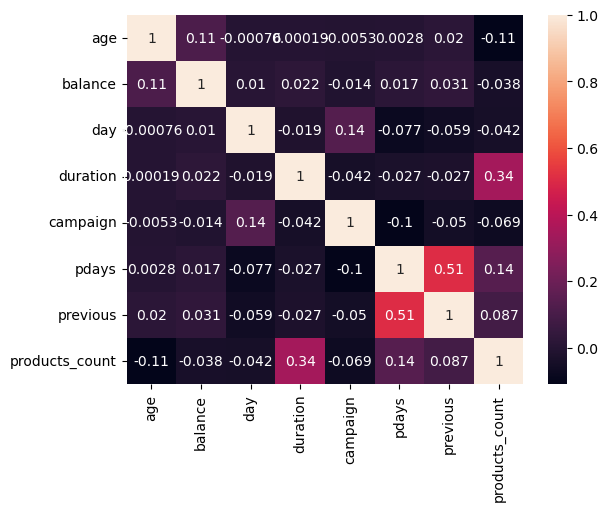

In [95]:
import matplotlib.pyplot as plt 
import seaborn as sns

# check correlation for numeric
sns.heatmap(bank_df[numeric_columns].corr(),annot=True)
plt.show()

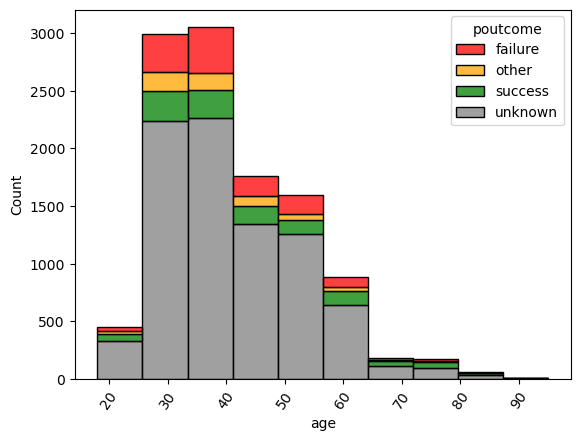

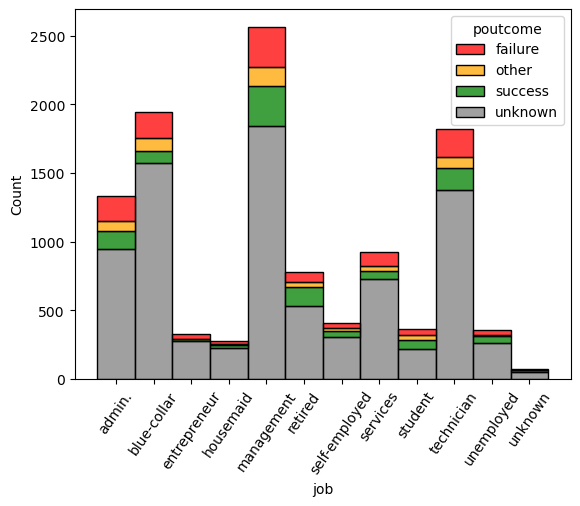

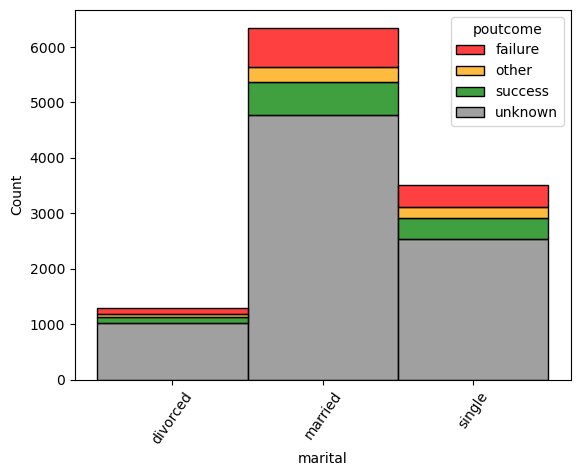

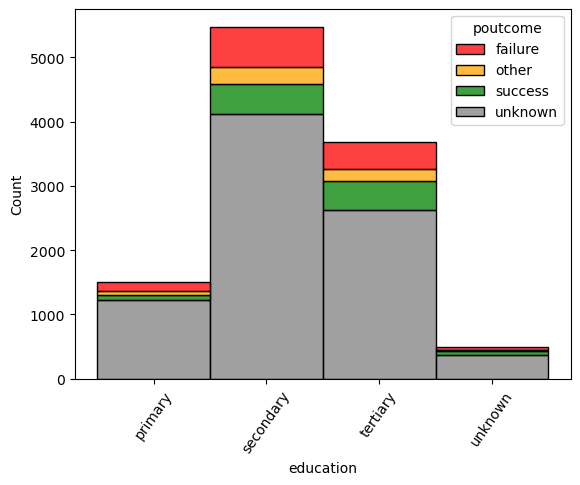

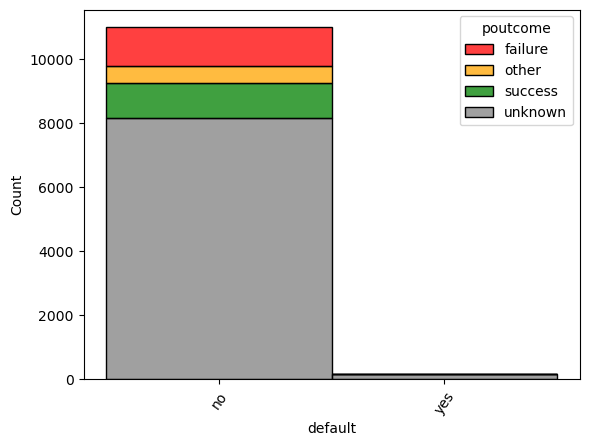

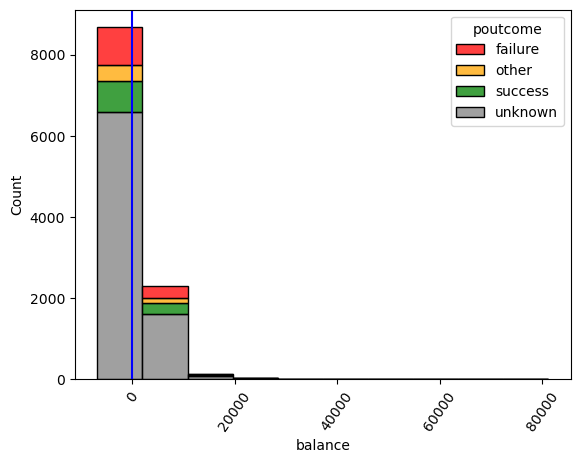

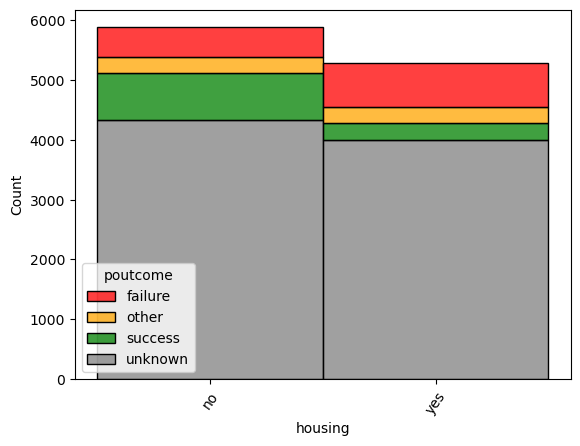

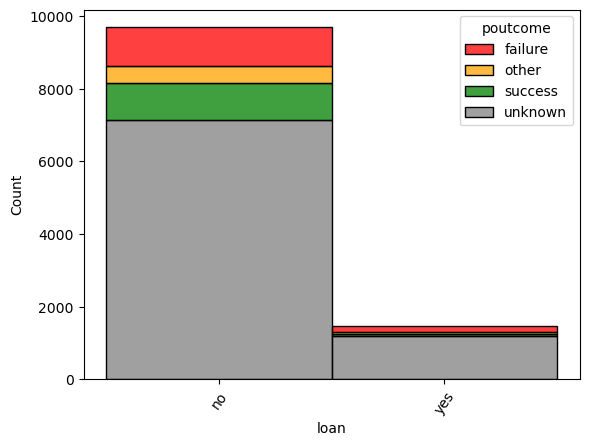

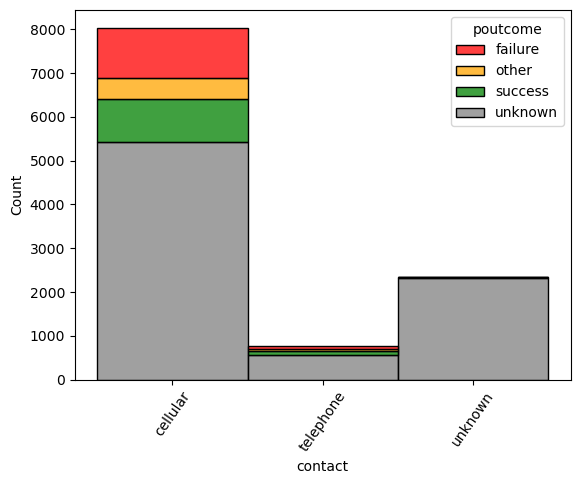

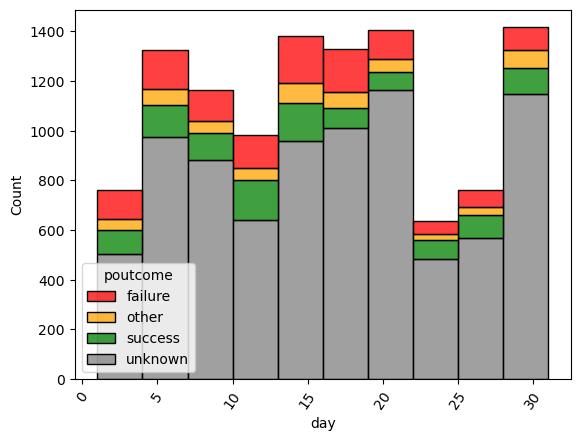

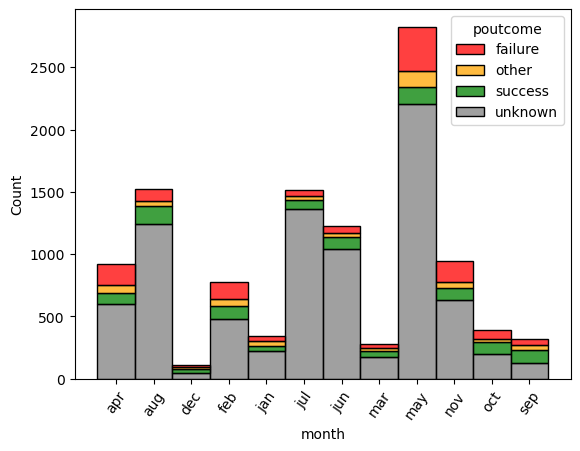

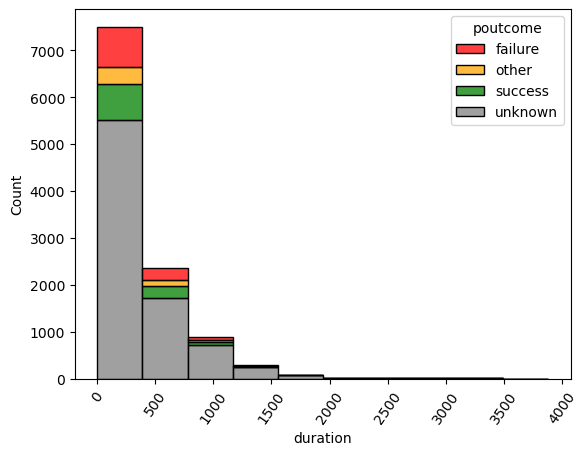

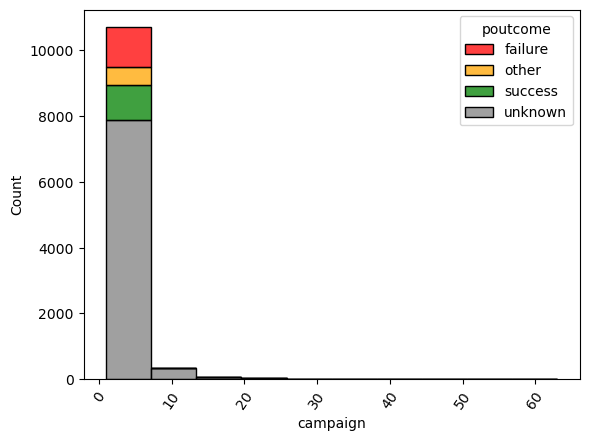

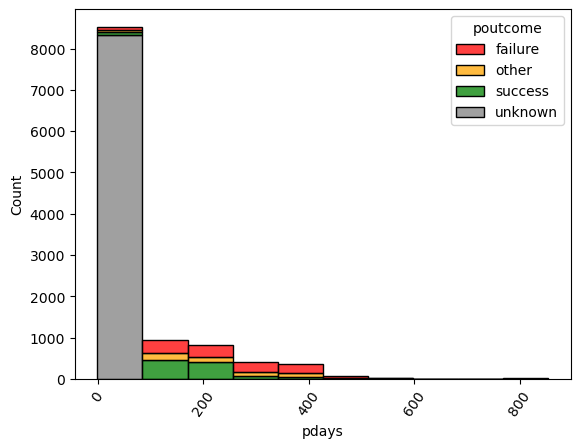

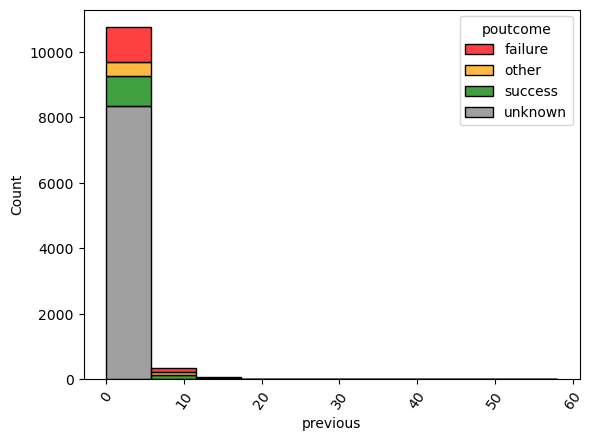

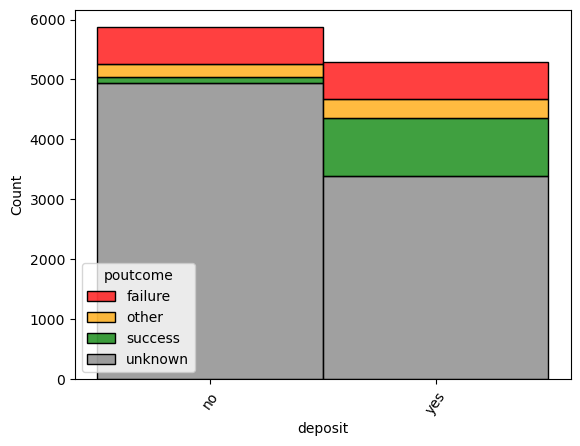

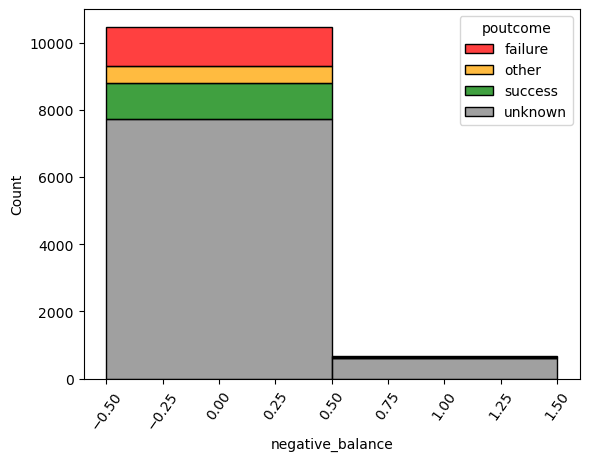

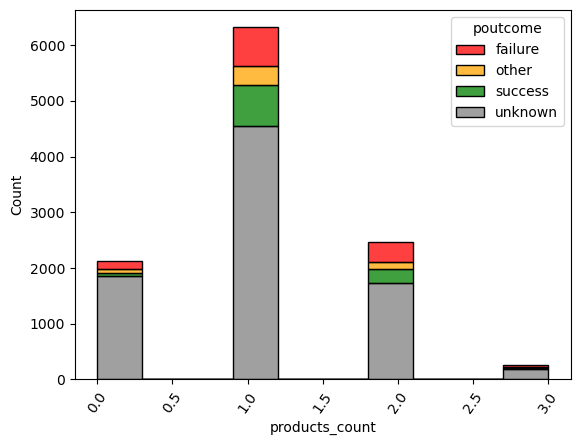

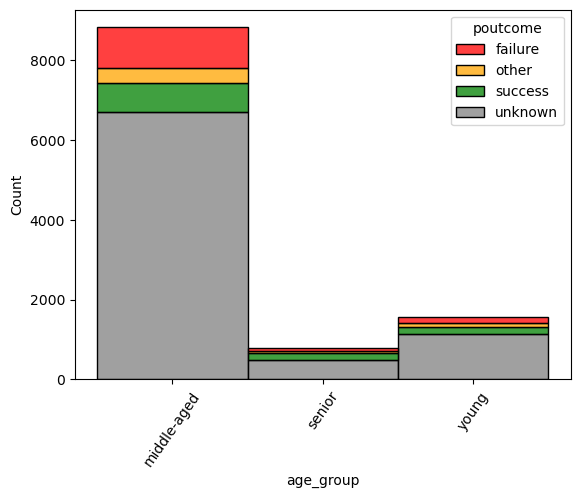

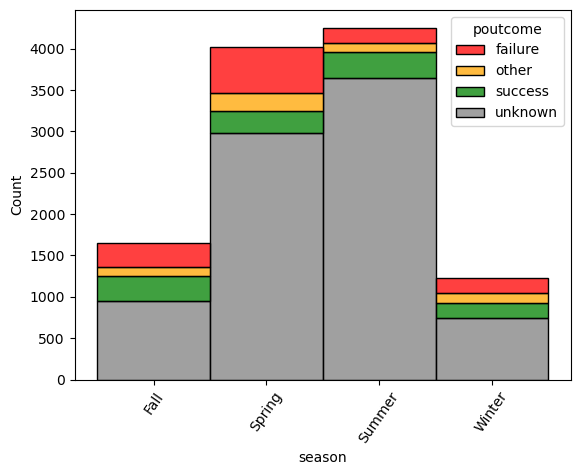

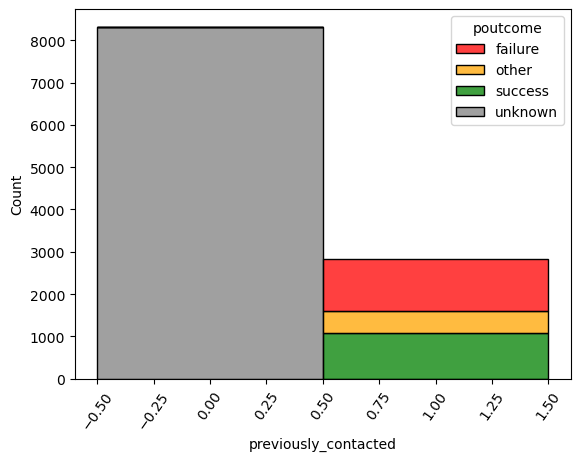

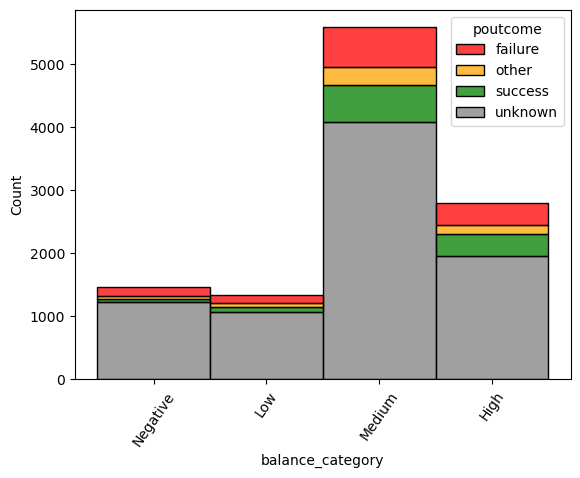

In [96]:
import numpy as np

success_total, failure_total = 0,0

# Plot the histogram for each column with hue set to poutcome that will show outcome of previous marketing campaigns
for col in bank_df.columns:
    if col == "poutcome":
        continue

    bins = 10 

    sns.histplot(data=bank_df, x=col, hue='poutcome', multiple='stack', palette=["red",'orange','green', 'grey'], bins=bins) 
    plt.xticks(rotation=55)
    if col == 'balance':
        plt.axvline(0,-100,8000, color='blue')
    plt.show()

- Most of the clients are middle aged, got secondary education, married, have one banking product, dont have loans, have medium balance and were contacted during spring-summer seasons.
- There are a lot of clients who were never contacted previously. 
- Clients who tend to have deposits were in success at previous marketing campaigns.

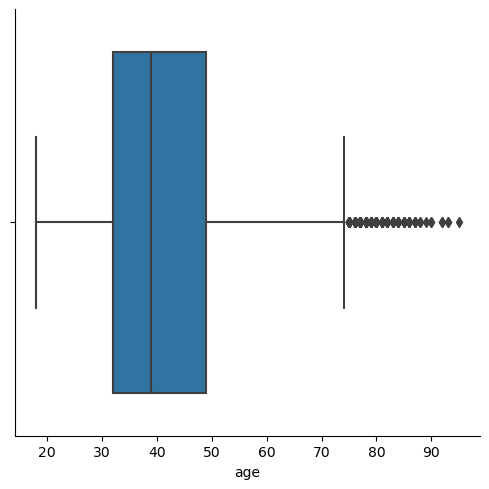

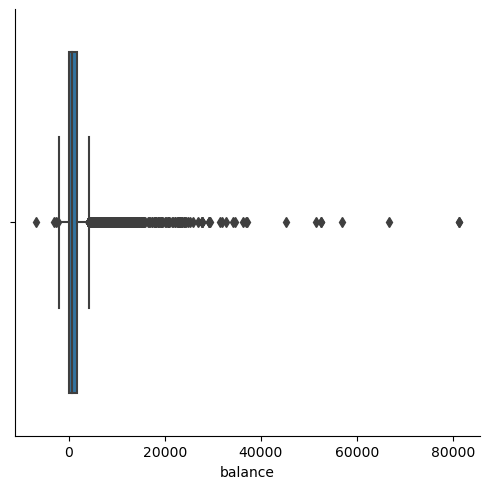

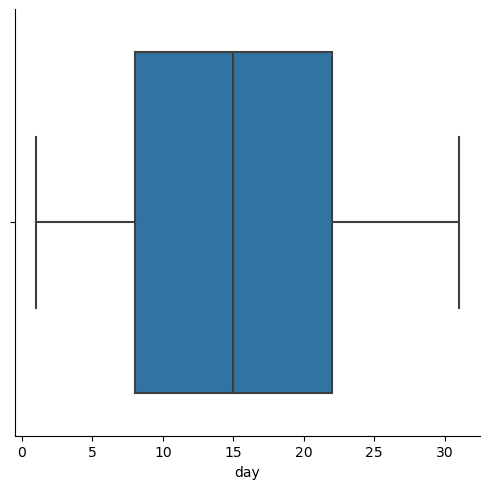

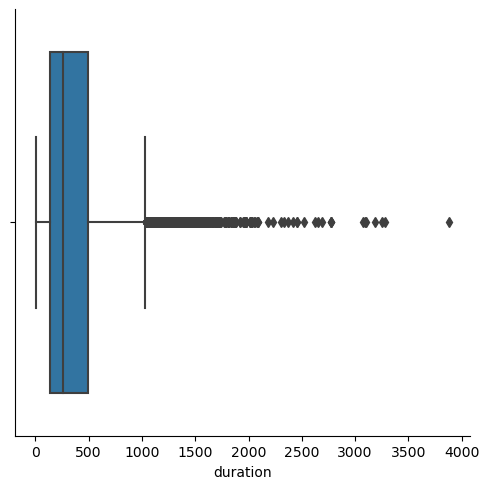

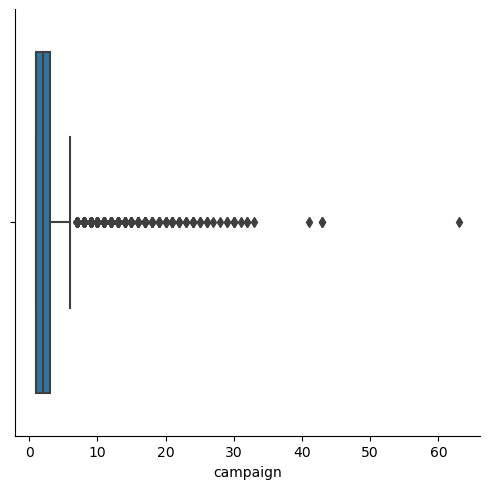

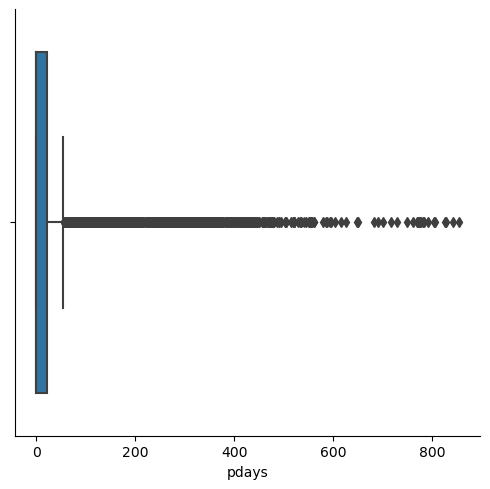

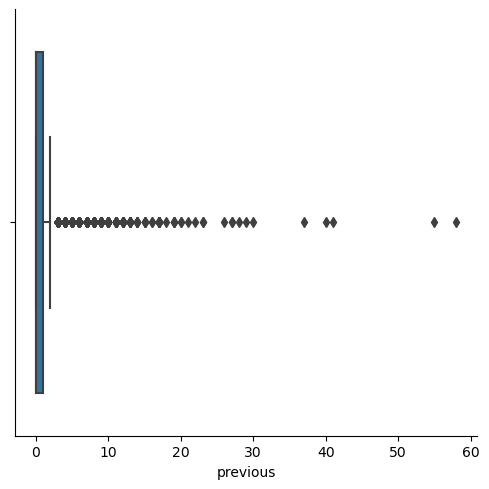

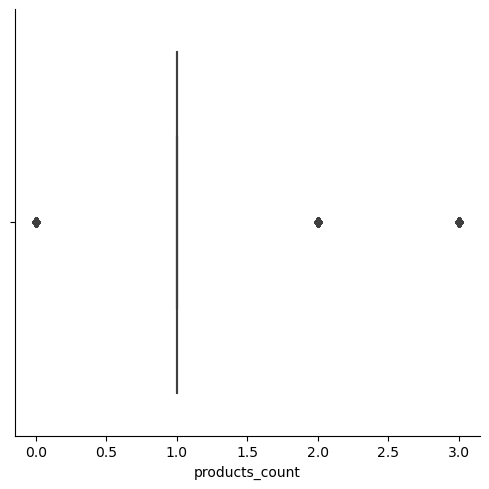

In [97]:
# box plots for numeric columns
for col in numeric_columns:
    sns.catplot(x=col, data=bank_df, kind='box')
    plt.show()

There are a lot of outliers but I created derivatives categorical columns out of this numeric.

## Preprocessing for machine learning

In [98]:
# Make categorical columns suitable for segmentation
bank_df_encoded = pd.get_dummies(bank_df[categorical_columns])
bank_df_encoded.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,negative_balance_1,age_group_middle-aged,age_group_senior,age_group_young,season_Fall,season_Spring,season_Summer,season_Winter,previously_contacted_0,previously_contacted_1
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [99]:
# Scale numeric columsn preparing for segmentation 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bank_df_preprocessed = bank_df[numeric_columns].copy()
bank_df_preprocessed[numeric_columns] = scaler.fit_transform(bank_df_preprocessed)
bank_df_preprocessed.head()

,age,balance,day,duration,campaign,pdays,previous,products_count
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,1.305233
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,-0.110059
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,1.305233
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,1.305233
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,-0.110059


In [100]:
# concat scaled and encoded datasets for machine learning
bank_df_preprocessed = pd.concat([bank_df_preprocessed, bank_df_encoded], axis=1)
bank_df_preprocessed.head()

,age,balance,day,duration,campaign,pdays,previous,products_count,job_admin.,job_blue-collar,...,negative_balance_1,age_group_middle-aged,age_group_senior,age_group_young,season_Fall,season_Spring,season_Summer,season_Winter,previously_contacted_0,previously_contacted_1
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,1.305233,True,False,...,False,True,False,False,False,True,False,False,True,False
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,-0.110059,True,False,...,False,True,False,False,False,True,False,False,True,False
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,1.305233,False,False,...,False,True,False,False,False,True,False,False,True,False
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,1.305233,False,False,...,False,True,False,False,False,True,False,False,True,False
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,-0.110059,True,False,...,False,True,False,False,False,True,False,False,True,False


## Customer Segmentation Modeling

In [101]:
# KMeans clusteing with silhouette scoring to choose optimal number of cluster 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
optimal_clusters = 0

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(bank_df_preprocessed)
    score = silhouette_score(bank_df_preprocessed, kmeans.labels_)
    
    if score > best_score:
        best_score = score
        optimal_clusters = n_clusters

print(f"Optimal number of clusters: {optimal_clusters}")

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
bank_df['kmeans_cluster'] = kmeans.fit_predict(bank_df_preprocessed)

/home/srjchsv/Downloads/ENTER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/srjchsv/Downloads/ENTER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/srjchsv/Downloads/ENTER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/srjchsv/Downloads/ENTER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/srjchsv/Downloads/ENTER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

Optimal number of clusters: 2


/home/srjchsv/Downloads/ENTER/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [102]:
# Hierarchical clusteing with silhouette scoring to choose optimal number of cluster 
from sklearn.cluster import AgglomerativeClustering

best_score = -1
optimal_clusters = 0

for n_clusters in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative.fit(bank_df_preprocessed)
    score = silhouette_score(bank_df_preprocessed, agglomerative.labels_)
    
    if score > best_score:
        best_score = score
        optimal_clusters = n_clusters

print(f"Optimal number of clusters: {optimal_clusters}")

hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
bank_df['hierarchical_cluster'] = hierarchical.fit_predict(bank_df_preprocessed)

Optimal number of clusters: 2


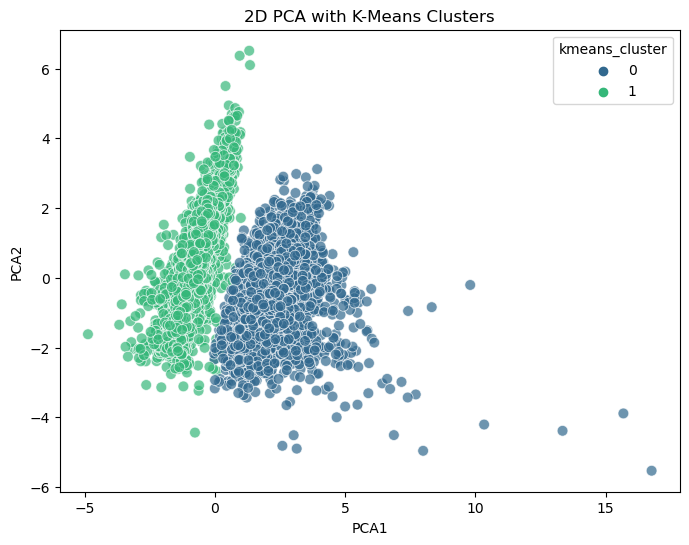

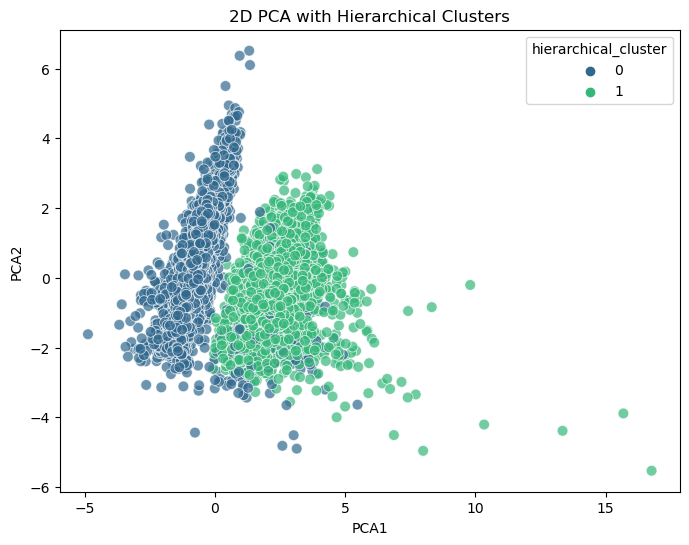

In [103]:
# Plotting the 2D PCA results with the cluster labels from each algorithm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bank_df_preprocessed)

bank_df['PCA1'] = pca_result[:, 0]
bank_df['PCA2'] = pca_result[:, 1]

def plot_pca_clusters(dataframe, cluster_col, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue=cluster_col, data=dataframe, palette='viridis', s=60, alpha=0.7)
    plt.title(title)
    plt.show()

plot_pca_clusters(bank_df, 'kmeans_cluster', '2D PCA with K-Means Clusters')
plot_pca_clusters(bank_df, 'hierarchical_cluster', '2D PCA with Hierarchical Clusters')


Used KMeans and AgglomerativeClustering algorithms for clustering performend silhouette_score for picking optimal number of cluster. In both cases 2 was selected.

For the furter analysis I will pick KMeans because it got better segmentation of clusters

## Customer Insights and Marketing Strategies

In [104]:
# Calculating the mean of each feature (both numeric and categorical) for each cluster
cluster_characteristics_all = bank_df.groupby('kmeans_cluster').agg(lambda x: x.mean() if x.dtype in ['int64', 'float64'] else x.mode().iloc[0])

# Display the central tendencies of various features across the different clusters
cluster_characteristics_all.transpose()

kmeans_cluster,0,1
age,41.799858,41.039693
job,management,management
marital,married,married
education,secondary,secondary
default,no,no
balance,1789.752745,1440.109725
housing,no,no
loan,no,no
contact,cellular,cellular
day,14.458732,16.064036


In [118]:
# create extensive categorical and numerical dataset for correlation analysis
categorical_dummies = pd.get_dummies(bank_df[['poutcome', 'deposit', 'loan', 'housing','previously_contacted','balance_category']]).astype('int')
corr_df = pd.concat([bank_df[numeric_columns+ ['kmeans_cluster']], categorical_dummies], axis=1)

In [119]:
def plot_corr(column, title, drop_columns):
    sorted_series = column.drop(drop_columns).sort_values(ascending=False)
    sns.barplot(y=sorted_series.index, x=sorted_series.values)
    plt.title(title)
    plt.show()

    print(f"\nCluster 1 most correlated features:\n=============================\n{sorted_series[sorted_series >= 0]}")
    print(f"\nCluster 0 most correlated features:\n=============================\n{sorted_series[sorted_series < 0].sort_values()}")


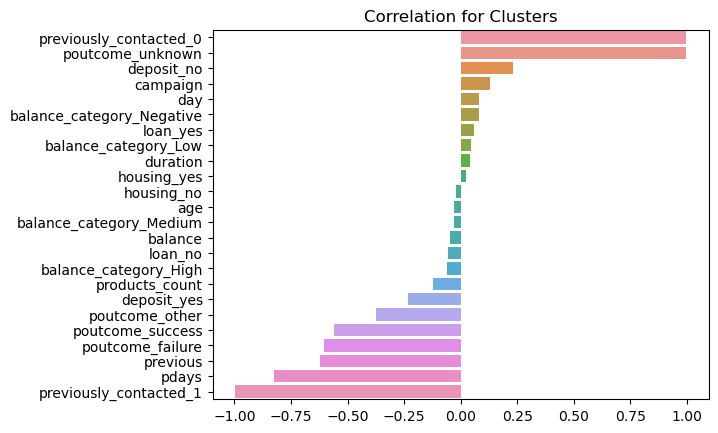


Cluster 1 most correlated features:
previously_contacted_0       0.996456
poutcome_unknown             0.995981
deposit_no                   0.232949
campaign                     0.131242
day                          0.082870
balance_category_Negative    0.079268
loan_yes                     0.058223
balance_category_Low         0.046678
duration                     0.042826
housing_yes                  0.021725
Name: kmeans_cluster, dtype: float64

Cluster 0 most correlated features:
previously_contacted_1    -0.996456
pdays                     -0.826563
previous                  -0.622358
poutcome_failure          -0.602963
poutcome_success          -0.559224
poutcome_other            -0.374831
deposit_yes               -0.232949
products_count            -0.121484
balance_category_High     -0.061584
loan_no                   -0.058223
balance                   -0.047123
balance_category_Medium   -0.030402
age                       -0.027737
housing_no                -0.021725
Name:

In [107]:
#  perform correlation calculation for kmeans_cluster series
corr = corr_df.corr()
plot_corr(corr['kmeans_cluster'], "Correlation for Clusters",['kmeans_cluster'])

### Cluster 1
- Not contacted previously
- Mostly dont have deposits
- Are in work for current marketing campaign
- Usualy low or negative balances
- Having loans and housing

### Cluster 0 
- Previously contacted
- Had mixed outcomes in previous marketing campaigns
- Tend to have banking products
- Have deposits
- Usualy dont have loans and housing
- Having high and medium balances
- Older age group


Now I want to further investigate and check the correlations for successful and failed marketing campaigns for clients who are related to cluster 0

In [108]:
print(f"Correlations for previously successful marketing campaigns:\n======================================\n{corr_df.corr()['poutcome_success'].sort_values(ascending=False)}")

Correlations for previously successful marketing campaigns:
poutcome_success             1.000000
previously_contacted_1       0.557940
pdays                        0.329567
previous                     0.325477
deposit_yes                  0.286642
housing_no                   0.136299
loan_no                      0.080370
products_count               0.067898
age                          0.062114
balance_category_High        0.053601
balance                      0.045603
balance_category_Medium      0.031389
duration                    -0.022578
balance_category_Low        -0.037195
day                         -0.044280
poutcome_other              -0.073240
balance_category_Negative   -0.079594
loan_yes                    -0.080370
campaign                    -0.091807
poutcome_failure            -0.114542
housing_yes                 -0.136299
deposit_no                  -0.286642
previously_contacted_0      -0.557940
poutcome_unknown            -0.558204
kmeans_cluster              

Clients in Cluster 0 successful marketing campaigns:
- Strong positive correlations with:
    - Previous successful outcomes
    - Gaps before client contact
    - Deposits
    - No housing and loans
    - Older age group with higher balances

In [109]:
print(f"Correlations for previously failed marketing campaigns:\n======================================\n{corr_df.corr()['poutcome_failure'].sort_values(ascending=False)}")

Correlations for previously failed marketing campaigns:
poutcome_failure             1.000000
pdays                        0.602615
previously_contacted_1       0.602139
previous                     0.335870
housing_yes                  0.087741
products_count               0.079627
balance_category_High        0.021858
deposit_yes                  0.020714
balance_category_Medium      0.008652
loan_yes                     0.006264
balance                      0.001695
loan_no                     -0.006264
age                         -0.008071
balance_category_Low        -0.018843
deposit_no                  -0.020714
balance_category_Negative   -0.022780
duration                    -0.033966
day                         -0.068381
poutcome_other              -0.079042
campaign                    -0.080188
housing_no                  -0.087741
poutcome_success            -0.114542
previously_contacted_0      -0.602139
poutcome_unknown            -0.602424
kmeans_cluster              -0.6

Clients in Cluster 0 failed marketing campaigns:
- Strong positive correlations with:
    - Previous failed outcomes
    - Gaps before client contact
    - Housing and loans
    - High and medium balances


## Final conclusion:

### Marketing strageties for Cluster 0 clients:
For clients with previous success in marketing campaigns:
- Target high value clients
- Prioritize those with deposits and no housing loans 
- Engage with clients who fall into and older age group with higer balances
- Implement loyalty programs to retain successful clients

For clients with previous fail in marketing campaigns:
- Offer exclusive incentives
- Ensure timely followup to mainatain interest
- Since clients more likely have housing and loans, offer refinancing options or tailored loan.
- Because clients tend to have high and medium balances offer specialized deposits.

### Marketing strageties for Cluster 1 clients: 
- Provide educational content about your offerings
- Encourage clients to make deposits by offering incentives
- Since clients more likely have housing and loans, offer refinancing options or tailored loan.
- For clients with low and negative balances, offer financial planning and tips to impove their financial situation
- Personalized follow ups

